## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

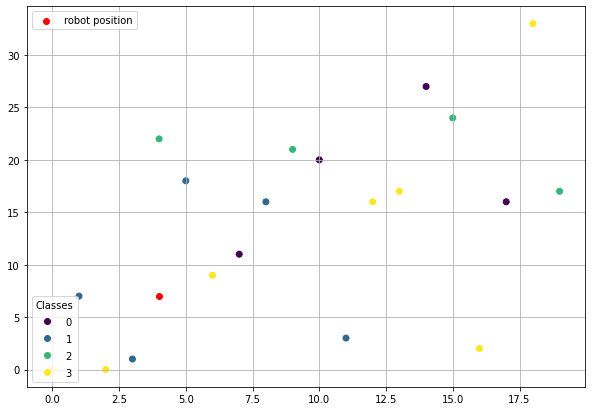

In [ ]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
import os
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
data.isna().sum().sum()

0

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:

data.head()
y = data['price']
X = data.drop(labels = 'price',axis=1,inplace=True)


In [ ]:
X = data
X.drop("Unnamed: 0",axis=1,inplace=True)
X

In [ ]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
X.corrwith(y)

Unnamed: 0   -0.306873
carat         0.921591
depth        -0.010647
table         0.127134
x             0.884435
y             0.865421
z             0.861249
dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
X.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [ ]:
cat_features_mask = (X.dtypes == "object").values

In [ ]:
cat_features_mask

array([False,  True,  True,  True, False, False, False, False, False])

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X_real = X[X.columns[~cat_features_mask]]
X_object = X[X.columns[cat_features_mask]]
new_data = pd.get_dummies(X_object,drop_first=True)
X = pd.concat([X_real,new_data],axis=1)
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_data2 = pd.DataFrame(data = scaler.fit_transform(X_real),columns = X_real.columns)
x = pd.concat([new_data2,new_data],axis = 1)
x.head(5)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 41, shuffle = True)
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
MSE_train = mean_squared_error(y_train,y_pred_train)
MSE_test = mean_squared_error(y_test,y_pred_test)
print("MSE_train {}".format(MSE_train))
print("MSE_test {}".format(MSE_test))
clf.intercept_

MSE_train 1234877.5261131392
MSE_test 1378046.960236092


-89.16590583091056

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
clf.coef_

array([ 7.64709922e+01,  5.43504561e+03, -8.84805347e+01, -6.15184545e+01,
       -1.16655811e+03, -3.49912939e+00, -5.32519355e+01,  6.33041421e+02,
        8.73137582e+02,  8.07731586e+02,  7.80758716e+02, -2.11987963e+02,
       -2.74016553e+02, -4.86549377e+02, -9.65799888e+02, -1.46974627e+03,
       -2.37261116e+03,  5.19671076e+03,  3.53519009e+03,  2.56630021e+03,
        4.43241680e+03,  4.13319046e+03,  4.85418633e+03,  4.80642443e+03])

In [ ]:
X_real.corr()

,Unnamed: 0,carat,depth,table,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,-0.405440,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha = 10)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
clf.coef_

array([   76.22290056,  4880.0693257 ,  -153.26233923,  -111.06198391,
        -764.70078448,    -0.        ,   -26.84635597,    -0.        ,
         154.82526941,    71.20401101,    89.25877381,     0.        ,
          -0.        ,  -122.18618515,  -594.25424734,  -993.03353413,
       -1783.43526326,  1287.45071915,     0.        ,  -821.17551664,
         799.594035  ,   571.71293572,  1125.56554288,  1146.57390146])

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha = 10)
clf.fit(x_train,y_train)
clf.coef_

array([ 7.68211045e+01,  5.38507137e+03, -8.99241817e+01, -6.43906805e+01,
       -1.11643897e+03, -1.58194611e+00, -6.73557823e+01,  6.54320677e+02,
        8.98546163e+02,  8.29767158e+02,  8.08137885e+02, -2.00142626e+02,
       -2.61019269e+02, -4.69271296e+02, -9.49205299e+02, -1.44403974e+03,
       -2.33666271e+03,  4.62714283e+03,  3.00895753e+03,  2.04735580e+03,
        3.89710359e+03,  3.60363783e+03,  4.30573393e+03,  4.26513230e+03])

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [ ]:
alpha_grid = [0.1,1,10,100,200]
classifier = []
for a in alpha_grid:
  clf = Lasso(alpha = a)
  clf.fit(x_train,y_train)
  classifier.append(clf)
  y_predicted = clf.predict(x_train)
  print(mean_squared_error(y_train,y_predicted))

1230143.5531714146
1234691.9280925211
1454209.8657512632
2183904.8164424384
2396446.7783595924


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
axis_x = []

In [ ]:
for i in range(len(classifier)):
  axis_x.append(np.linalg.norm(classifier[i].coef_))

np.sort(axis_x)

array([ 3485.02028782,  3691.30819781,  5907.0826627 , 11851.07328228,
       12983.95004831])

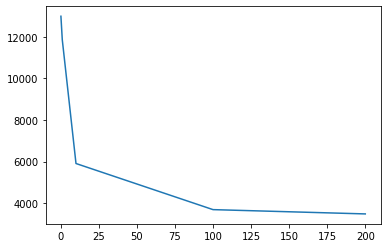

In [ ]:
plt.plot(alpha_grid,axis_x)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs_cv = GridSearchCV(Lasso(), param_grid = {'alpha':alpha_grid}, verbose= 1,)

In [ ]:
gs_cv.fit(x_train,y_train)
from sklearn.neighbors import KNeighborsClassifier

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1036287087.6872597, tolerance: 48235041.79781578
  positive)
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.9s finished


In [ ]:
gs_cv.best_params_

{'alpha': 1}

In [ ]:
mean_squared_error(y_train,gs_cv.predict(x_train))

1234691.9280925211

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
LCV = LassoCV(alphas = alpha_grid, cv = 5)

In [ ]:
LCV.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1727926697.5259247, tolerance: 48235041.79781577
  tol, rng, random, positive)


LassoCV(alphas=[0.1, 1, 10, 100, 200], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
alpha_grid

[0.1, 1, 10, 100, 200]

In [ ]:
LCV.alphas_

array([2.e+02, 1.e+02, 1.e+01, 1.e+00, 1.e-01])

In [ ]:
LCV.mse_path_

array([[2457470.27034474, 2339293.19145847, 2436683.57769526,
        2431356.87282384, 2318598.28824797],
       [2237795.27985046, 2126456.28194575, 2221697.69265532,
        2219823.4132731 , 2115351.51653151],
       [1459634.12225611, 1436545.75405552, 1492598.54466899,
        1498114.58651732, 1394267.18997702],
       [1259014.03201153, 1217167.26107947, 1243701.38442841,
        1267018.57150108, 1199495.40269138],
       [1257699.59097933, 1211392.85606809, 1235343.08323397,
        1261978.65250728, 1241540.00907851]])

In [ ]:
np.mean(LCV.mse_path_, axis = 0)

array([1734322.65908843, 1666171.06892146, 1726004.85653639,
       1735658.41932453, 1653850.48130528])

In [ ]:
x_train.drop("Unnamed: 0",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
LS = Lasso(alpha = 1)
LS.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
LS.coef_


array([ 5413.02755763,  -103.04543918,   -70.1522232 , -1188.39157368,
          -0.        ,   -55.011359  ,   515.70908217,   765.21353606,
         696.52471523,   672.66358862,  -156.78664362,  -217.38581005,
        -425.68219474,  -911.33527221, -1397.14859637, -2288.56472859,
        4640.62735893,  3011.95760466,  2036.40757244,  3899.62233854,
        3609.03077334,  4311.69036606,  4274.83919753])

In [ ]:
x_test.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
48902,-0.607459,0.174922,-1.099672,-0.553739,-0.520544,-0.522514,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
46602,-0.544169,-0.941922,1.137995,-0.437849,-0.450499,-0.536684,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53040,-0.185524,0.523936,-0.204605,-0.054519,-0.038985,0.015965,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
35494,-0.818426,1.361569,0.242928,-0.883581,-0.897036,-0.749241,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
41390,-0.797330,-0.034486,0.690462,-0.812264,-0.835746,-0.820094,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_predicted = LR.predict(x_train)
mean_squared_error(y_test,LR.predict(x_test))

1378046.960236092

In [ ]:
LS = Lasso(alpha=0.1)
LS.fit(x_train,y_train)
mean_squared_error(y_test,LS.predict(x_test))

1378548.296558068